> **前言：** 刚刚读完 Sutton 的《强化学习（第二版）》第5章：蒙特卡洛方法。在本文中用尽量简单直白的语言复述本章的思想，各个知识点之间的关系。

笔者阅读的是中文书籍，提到的具体公式笔者将给出其所在的英文版本的页码，英文书籍原文见 Sutton 本人官网：
[http://incompleteideas.net/book/the-book.html](http://incompleteideas.net/book/the-book.html)。

本章目录：
5.1 蒙特卡洛预测
5.2 动作价值的蒙特卡洛估计
5.3 蒙特卡洛控制
5.4 没有试探性出发假设的蒙特卡洛控制
5.5 基于重要度采样的离轨策略
5.6 增量式实现
5.7 离轨策略蒙特卡洛控制
5.8 折扣敏感的重要度采样
5.9 每次决策型重要度采样
5.10 本章小结

****

### 各小节间结构关系

首先，本章介绍中指出蒙特卡洛的优点与特殊性，即：
- 无需拥有完备的关于环境的信息，蒙特卡洛方法从真实或模拟的环境中交互采样即可；
- 蒙特卡洛是基于每一幕进行改进的，而非每一步（而非每一次动作）进行改进（be incremental in an episode-by-episode sense, but not in
a step-by-step (online) sense）；
- 蒙特卡洛方法在马尔科夫性不成立时性能损失较小，因为不需要用后继状态的估计值来更新当前的估值。

基于上述特点，在已知环境中的很多幕的序列的情况下，“5.1 蒙特卡洛预测”提出了两种蒙特卡洛预测方法：
- 首次访问型MC预测算法（first-visit MC method）；
- 每次访问型MC预测算法（every-visit MC method）。

![](images/04-01.png)

“5.2 动作价值的蒙特卡洛估计”则告诉读者：在实际环境中，很难保证所有“状态-动作”都出现过一遍，因此可能有采样不足的问题。因此，我们可以通过设置每个“状态-动作”的第一次采样的概率都不为0，来进行 **试探性出发** 。或者使用别的思想。接下来的讨论中， **我们先保留试探性出发的假设** 。

基于广义策略迭代（GPI）的思想，“5.3 蒙特卡洛控制”讨论了使用贪心更新策略下，蒙特卡洛算法的向最优策略的收敛性（数学上可以证明，见P97-98），并且，给出了 **基于试探性出发的蒙特卡洛（蒙特卡洛 ES）** 算法框架。

值得注意的是，为了保证蒙特卡洛算法收敛，我们做了两个假设：
1. 试探性出发；
2. 在进行策略评估时有无限多幕的样本序列进行试探。

为了在应用中消除两个假设的影响，我们需要设计算法。 **基于试探性出发的蒙特卡洛（蒙特卡洛 ES）采用了GPI的思想，即不再要求在策略改进前就完成策略评估，这可以有效消除假设2的影响。**

**“5.4 没有试探性出发假设的蒙特卡洛控制”以后的内容则是讨论如何消除假设1的影响。**

为了消除假设1（“试探性出发”）的影响，我们采用：
- 同轨策略（on-policy）；
- 离轨策略（off-policy）。

在通过策略中，我们观测到的“状态、动作、回报”序列是遵从我们的策略的，在我看来，可以理解为： **我们一边观测我们的系统，一边改进它；但是并非在线改进，而是以幕为单位进行改进，即遵循：“由策略生成序列-由序列更新动作期望-由期望更新最优动作-进而更新策略”** 。其算法框图见书P101：

![](images/04-02.png)

但是，注意到“由策略生成序列”这个步骤。在很多情况下，我们得到的序列并非是我们完全可控的，即 **我们无法由我们自己的策略生产序列** 。这就需要一种 **能够使用与自己策略无关的序列，来更新自己策略的方法了，即离轨策略。**

离轨策略相对复杂，书上分为几个小节对其进行分步讲解：
- “5.5 基于重要度采样的离轨策略”本节中主要讨论了评估离轨序列价值所要用到的概念：重要度采样比，并且提出了“普通重要度采样”与“加权重要度采样”，告诉读者“加权重要度采样”的估计方差为1，而非“普通重要度采样”的无穷，但是“加权重要度采样”是有偏的，但是偏差会收敛到0。 **其中，我还对重要度采样比有一点心得，见[1]** ；
- “5.6 增量式实现”则对价值更新公式做了一个很简单的推导[2]；
- 现在有了 **能够估计离轨策略价值** 的前提，可以开始讨论如何对策略进行更新了，“5.7 离轨策略蒙特卡洛控制”给出了 **离轨策略MC控制算法** ，并附有算法框图。
- “5.8 折扣敏感的重要度采样”讨论了：如果考虑（回报中的）折扣，那么在离轨策略中，如何考虑回报、更新价值。这减小了方差，更利于收敛，即 **折扣敏感的重要度采样** ；
- “5.9 每次决策型重要度采样”讨论了：不考虑折扣，也可减小方差。使用 **每次决策型重要度采样** 来进行无偏估计即可。

书上给出了2个例子：
1. 二十一点游戏，用于说明蒙特卡洛的基本思想；
2. 单状态MDP，用于说明普通重要度采样的方差不收敛性。我对于证明$\pi (\text{left} | s) = 1$策略下的期望有一点心得，见[3]。

### 补充知识点与心得

#### [1] 重要度采样比心得

重要度采样比定义为：在目标策略和行动策略轨迹下的相对概率。经过推导，即

$$\rho_{t:T-1} = \prod_{k=t}^{T-1} \frac{\pi (A_k | S_k)}{b(A_k | S_k)}$$

为什么这么定义这个参数，或者说，长成这样的公式有什么用？

我们来看其使用场景，普通重要度采样：

$$V(s) = \frac{\sum_{t \in \tau(s)} \rho_{t:T(t)-1} G_t}{|\tau(s)|}$$

加权重要度采样：

$$V(s) = \frac{\sum_{t \in \tau(s)} \rho_{t:T(t)-1} G_t}{\sum_{t \in \tau(s)} \rho_{t:T(t)-1}}$$

其中，二者的期望分别接近$v_{\pi}(s)$与$v_{b}(s)$，而这个 **重要度采样比** 在其中的作用为：当观测值贴近策略$\pi$时，此时取得的**G**更加重要，影响更大，因此其系数 **重要度采样比** 增大。

#### [2] 增量式实现更新公式简单推导

把下式转换为增量式：

$$V_n = \frac{\sum^{n-1}_{k=1}W_k G_k}{\sum^{n-1}_{k=1}W_k}, \quad n \ge 2$$

书上没有给出，因为太简单了，我在这里证明一下。

$$\begin{aligned}
V_{n+1} & = \frac{\sum^{n}_{k=1}W_k G_k}{\sum^{n}_{k=1}W_k}, \quad n \ge 2 \\
& = \frac{1}{\sum^{n}_{k=1}W_k} (W_n G_n + V_n \sum^{n-1}_{k=1} W_k) \\
& = \frac{1}{\sum^{n}_{k=1}W_k} (W_n G_n + V_n (\sum^{n}_{k=1}W_k - W_n)) \\
& = V_n + \frac{1}{\sum^{n}_{k=1}W_k} (W_n G_n - W_n V_n)
\end{aligned}$$

即答案：

$$V_{n+1} = V_n + \frac{W_n}{C_n}[G_n - V_n]$$

$$其中，C_{n+1} = C_n + W_{n+1}$$

#### [2] 单状态MDP中，$\pi (\text{left} | s) = 1$策略下的期望

![](images/04-03.png)

期望 E 为：

$$\begin{aligned}
E & = 1 \times E(left) + 0 \times E(right) \\
& = 1 \times E(left) \\
& = 0.1 \times 1 + 0.9 \times E
\end{aligned}$$

解得 E = 1 。

### 两个实例

代码来自 Zhang ：
[ShangtongZhang/reinforcement-learning-an-introduction/chapter05](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/tree/master/chapter05)

#### Example 5.1: Blackjack

The object of the popular casino card game of blackjack is to obtain cards the sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust ). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks
according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose final sum is closer to 21.

Playing blackjack is naturally formulated as an episodic finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards within a game are zero, and we do not discount ($\gamma = 1$); therefore these terminal rewards are also the returns. The player’s actions are to hit or to stick. The states depend on the player’s cards and the dealer’s showing card. We assume that cards are dealt from an infinite deck (i.e., with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that he could count as 11 without going bust, then the ace is said to be usable. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: his current sum (12–21), the dealer’s one showing card (ace–10), and whether or not he holds a usable ace. This makes for a total of 200 states.

In [13]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# 2017 Nicky van Foreest(vanforeest@gmail.com)                        #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# actions: hit or stand
ACTION_HIT = 0
ACTION_STAND = 1  #  "strike" in the book
ACTIONS = [ACTION_HIT, ACTION_STAND]

# policy for player
POLICY_PLAYER = np.zeros(22, dtype=np.int)
for i in range(12, 20):
    POLICY_PLAYER[i] = ACTION_HIT
POLICY_PLAYER[20] = ACTION_STAND
POLICY_PLAYER[21] = ACTION_STAND
'''
POLICY_PLAYER 是全局变量，是 同轨控制 或 ES 试探性出发中的当前 $\pi$
问题：figure_5_2() 中好像没有对 POLICY_PLAYER 进行初始化？
'''

# function form of target policy of player
def target_policy_player(usable_ace_player, player_sum, dealer_card):
    return POLICY_PLAYER[player_sum]

# function form of behavior policy of player
'''
应该是离轨的 b 策略（即我们能观测到的，但不可控的策略）
'''
def behavior_policy_player(usable_ace_player, player_sum, dealer_card):
    if np.random.binomial(1, 0.5) == 1:
        return ACTION_STAND
    return ACTION_HIT

# policy for dealer
POLICY_DEALER = np.zeros(22)
for i in range(12, 17):
    POLICY_DEALER[i] = ACTION_HIT
for i in range(17, 22):
    POLICY_DEALER[i] = ACTION_STAND

# get a new card
def get_card():
    card = np.random.randint(1, 14)
    card = min(card, 10)
    return card

# get the value of a card (11 for ace).
def card_value(card_id):
    return 11 if card_id == 1 else card_id

# play a game
# @policy_player: specify policy for player
# @initial_state: [whether player has a usable Ace, sum of player's cards, one card of dealer]
# @initial_action: the initial action
def play(policy_player, initial_state=None, initial_action=None):
    # player status

    # sum of player
    player_sum = 0

    # trajectory of player
    player_trajectory = []

    # whether player uses Ace as 11
    usable_ace_player = False

    # dealer status
    dealer_card1 = 0
    dealer_card2 = 0
    usable_ace_dealer = False

    if initial_state is None:
        # generate a random initial state

        while player_sum < 12:
            # if sum of player is less than 12, always hit
            card = get_card()
            player_sum += card_value(card)

            # If the player's sum is larger than 21, he may hold one or two aces.
            if player_sum > 21:
                assert player_sum == 22
                # last card must be ace
                player_sum -= 10
            else:
                usable_ace_player |= (1 == card)
                '''
                1 == 1: True 有可用的 A ，且在 1 与 11 中选择值
                1 == others : 没有可用 A
                '''

        # initialize cards of dealer, suppose dealer will show the first card he gets
        dealer_card1 = get_card()
        dealer_card2 = get_card()

    else:
        # use specified initial state
        usable_ace_player, player_sum, dealer_card1 = initial_state
        dealer_card2 = get_card()

    # initial state of the game
    state = [usable_ace_player, player_sum, dealer_card1]

    # initialize dealer's sum
    dealer_sum = card_value(dealer_card1) + card_value(dealer_card2)
    usable_ace_dealer = 1 in (dealer_card1, dealer_card2)
    # if the dealer's sum is larger than 21, he must hold two aces.
    if dealer_sum > 21:
        assert dealer_sum == 22
        # use one Ace as 1 rather than 11
        dealer_sum -= 10
    assert dealer_sum <= 21
    assert player_sum <= 21

    # game starts!

    # player's turn
    while True:
        if initial_action is not None:
            action = initial_action
            initial_action = None
        else:
            # get action based on current sum
            action = policy_player(usable_ace_player, player_sum, dealer_card1)

        # track player's trajectory for importance sampling
        player_trajectory.append([(usable_ace_player, player_sum, dealer_card1), action])

        if action == ACTION_STAND:
            break
        # if hit, get new card
        card = get_card()
        # Keep track of the ace count. the usable_ace_player flag is insufficient alone as it cannot
        # distinguish between having one ace or two.
        ace_count = int(usable_ace_player)
        if card == 1:
            ace_count += 1
        player_sum += card_value(card)
        # If the player has a usable ace, use it as 1 to avoid busting and continue.
        while player_sum > 21 and ace_count:
            player_sum -= 10
            ace_count -= 1
        # player busts
        if player_sum > 21:
            return state, -1, player_trajectory
        assert player_sum <= 21
        usable_ace_player = (ace_count == 1)

    # dealer's turn
    while True:
        # get action based on current sum
        action = POLICY_DEALER[dealer_sum]
        if action == ACTION_STAND:
            break
        # if hit, get a new card
        new_card = get_card()
        ace_count = int(usable_ace_dealer)
        if new_card == 1:
            ace_count += 1
        dealer_sum += card_value(new_card)
        # If the dealer has a usable ace, use it as 1 to avoid busting and continue.
        while dealer_sum > 21 and ace_count:
            dealer_sum -= 10
            ace_count -= 1
        # dealer busts
        if dealer_sum > 21:
            return state, 1, player_trajectory
        usable_ace_dealer = (ace_count == 1)

    # compare the sum between player and dealer
    assert player_sum <= 21 and dealer_sum <= 21
    if player_sum > dealer_sum:
        return state, 1, player_trajectory
    elif player_sum == dealer_sum:
        return state, 0, player_trajectory
    else:
        return state, -1, player_trajectory

# Monte Carlo Sample with On-Policy
def monte_carlo_on_policy(episodes):
    states_usable_ace = np.zeros((10, 10))
    # initialze counts to 1 to avoid 0 being divided
    states_usable_ace_count = np.ones((10, 10))
    states_no_usable_ace = np.zeros((10, 10))
    # initialze counts to 1 to avoid 0 being divided
    states_no_usable_ace_count = np.ones((10, 10))
    for i in tqdm(range(0, episodes)):
        _, reward, player_trajectory = play(target_policy_player)
        for (usable_ace, player_sum, dealer_card), _ in player_trajectory:
            player_sum -= 12
            dealer_card -= 1
            '''
            palyer_sum 的值大于等于 12
            减 12 是为了将其哈希映射到 [0, #]
            dealer_card 同理
            '''
            if usable_ace:
                states_usable_ace_count[player_sum, dealer_card] += 1
                states_usable_ace[player_sum, dealer_card] += reward
            else:
                states_no_usable_ace_count[player_sum, dealer_card] += 1
                states_no_usable_ace[player_sum, dealer_card] += reward
    return states_usable_ace / states_usable_ace_count, states_no_usable_ace / states_no_usable_ace_count

# Monte Carlo with Exploring Starts
def monte_carlo_es(episodes):
    '''
    书 P99
    对策略有控制，即尝试逼近 $\pi_*$
    '''
    # (playerSum, dealerCard, usableAce, action)
    state_action_values = np.zeros((10, 10, 2, 2))
    # initialze counts to 1 to avoid division by 0
    state_action_pair_count = np.ones((10, 10, 2, 2))

    # behavior policy is greedy
    def behavior_policy(usable_ace, player_sum, dealer_card):
        usable_ace = int(usable_ace)
        player_sum -= 12
        dealer_card -= 1
        # get argmax of the average returns(s, a)
        values_ = state_action_values[player_sum, dealer_card, usable_ace, :] / \
                  state_action_pair_count[player_sum, dealer_card, usable_ace, :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

    # play for several episodes
    for episode in tqdm(range(episodes)):
        # for each episode, use a randomly initialized state and action
        initial_state = [bool(np.random.choice([0, 1])),
                       np.random.choice(range(12, 22)),
                       np.random.choice(range(1, 11))]
        initial_action = np.random.choice(ACTIONS)
        current_policy = behavior_policy if episode else target_policy_player
        '''
        current_policy 是一个函数指针
        第 1 幕，使用 behavior_policy
        第 1 幕后，已有学习数据，使用 target_policy_player
        '''
        _, reward, trajectory = play(current_policy, initial_state, initial_action)
        for (usable_ace, player_sum, dealer_card), action in trajectory:
            usable_ace = int(usable_ace)
            player_sum -= 12
            dealer_card -= 1
            # update values of state-action pairs
            state_action_values[player_sum, dealer_card, usable_ace, action] += reward
            state_action_pair_count[player_sum, dealer_card, usable_ace, action] += 1

    return state_action_values / state_action_pair_count

# Monte Carlo Sample with Off-Policy
def monte_carlo_off_policy(episodes):
    '''
    对二十一点游戏分布进行离轨策略，没有控制：
    - 普通重要度采样
    - 加权重要度采样
    （因为这个问题中，每幕的回报为 0 / 1 ，因此更新公式看起来有些奇怪 \
        且 离轨观测序列 b 策略服从二项分布）
    最后比较二者（两个采样率下 价值 的均方误差）
    （我对于均方误差的更新公式存疑，需要进行数学推导）
    '''
    initial_state = [True, 13, 2]

    rhos = []
    returns = []

    for i in range(0, episodes):
        _, reward, player_trajectory = play(behavior_policy_player, initial_state=initial_state)

        # get the importance ratio
        numerator = 1.0
        denominator = 1.0
        for (usable_ace, player_sum, dealer_card), action in player_trajectory:
            if action == target_policy_player(usable_ace, player_sum, dealer_card):
                denominator *= 0.5
            else:
                numerator = 0.0
                break
        rho = numerator / denominator
        rhos.append(rho)
        returns.append(reward)

    rhos = np.asarray(rhos)
    returns = np.asarray(returns)
    '''
    以后多用 np.asarray() 少用 np.array()
    '''
    weighted_returns = rhos * returns

    weighted_returns = np.add.accumulate(weighted_returns)
    rhos = np.add.accumulate(rhos)

    ordinary_sampling = weighted_returns / np.arange(1, episodes + 1)

    with np.errstate(divide='ignore',invalid='ignore'):
        weighted_sampling = np.where(rhos != 0, weighted_returns / rhos, 0)

    return ordinary_sampling, weighted_sampling

def figure_5_1():
    '''
    没有试探性出发
    使用同轨策略
    不仅仅评估价值，有控制
    '''
    states_usable_ace_1, states_no_usable_ace_1 = monte_carlo_on_policy(10000)
    states_usable_ace_2, states_no_usable_ace_2 = monte_carlo_on_policy(500000)

    states = [states_usable_ace_1,
              states_usable_ace_2,
              states_no_usable_ace_1,
              states_no_usable_ace_2]

    titles = ['Usable Ace, 10000 Episodes',
              'Usable Ace, 500000 Episodes',
              'No Usable Ace, 10000 Episodes',
              'No Usable Ace, 500000 Episodes']

    _, axes = plt.subplots(2, 2, figsize=(40, 30))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    axes = axes.flatten()

    for state, title, axis in zip(states, titles, axes):
        fig = sns.heatmap(np.flipud(state), cmap="YlGnBu", ax=axis, xticklabels=range(1, 11),
                          yticklabels=list(reversed(range(12, 22))))
        fig.set_ylabel('player sum', fontsize=30)
        fig.set_xlabel('dealer showing', fontsize=30)
        fig.set_title(title, fontsize=30)

    plt.show()

def figure_5_2():
    state_action_values = monte_carlo_es(500000)

    state_value_no_usable_ace = np.max(state_action_values[:, :, 0, :], axis=-1)
    state_value_usable_ace = np.max(state_action_values[:, :, 1, :], axis=-1)

    # get the optimal policy
    action_no_usable_ace = np.argmax(state_action_values[:, :, 0, :], axis=-1)
    action_usable_ace = np.argmax(state_action_values[:, :, 1, :], axis=-1)

    images = [action_usable_ace,
              state_value_usable_ace,
              action_no_usable_ace,
              state_value_no_usable_ace]

    titles = ['Optimal policy with usable Ace',
              'Optimal value with usable Ace',
              'Optimal policy without usable Ace',
              'Optimal value without usable Ace']

    _, axes = plt.subplots(2, 2, figsize=(40, 30))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    axes = axes.flatten()

    for image, title, axis in zip(images, titles, axes):
        fig = sns.heatmap(np.flipud(image), cmap="YlGnBu", ax=axis, xticklabels=range(1, 11),
                          yticklabels=list(reversed(range(12, 22))))
        fig.set_ylabel('player sum', fontsize=30)
        fig.set_xlabel('dealer showing', fontsize=30)
        fig.set_title(title, fontsize=30)

    plt.show()

def figure_5_3():
    true_value = -0.27726
    episodes = 10000
    runs = 100
    error_ordinary = np.zeros(episodes)
    error_weighted = np.zeros(episodes)
    for i in tqdm(range(0, runs)):
#     for i in range(runs):
        ordinary_sampling_, weighted_sampling_ = monte_carlo_off_policy(episodes)
        # get the squared error
        error_ordinary += np.power(ordinary_sampling_ - true_value, 2)
        error_weighted += np.power(weighted_sampling_ - true_value, 2)
    error_ordinary /= runs
    error_weighted /= runs

    plt.plot(error_ordinary, label='Ordinary Importance Sampling')
    plt.plot(error_weighted, label='Weighted Importance Sampling')
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Mean square error')
    plt.xscale('log')
    plt.legend()

    plt.show()

100%|█████████████████████████████| 500000/500000 [00:06<00:00, 71762.11it/s]


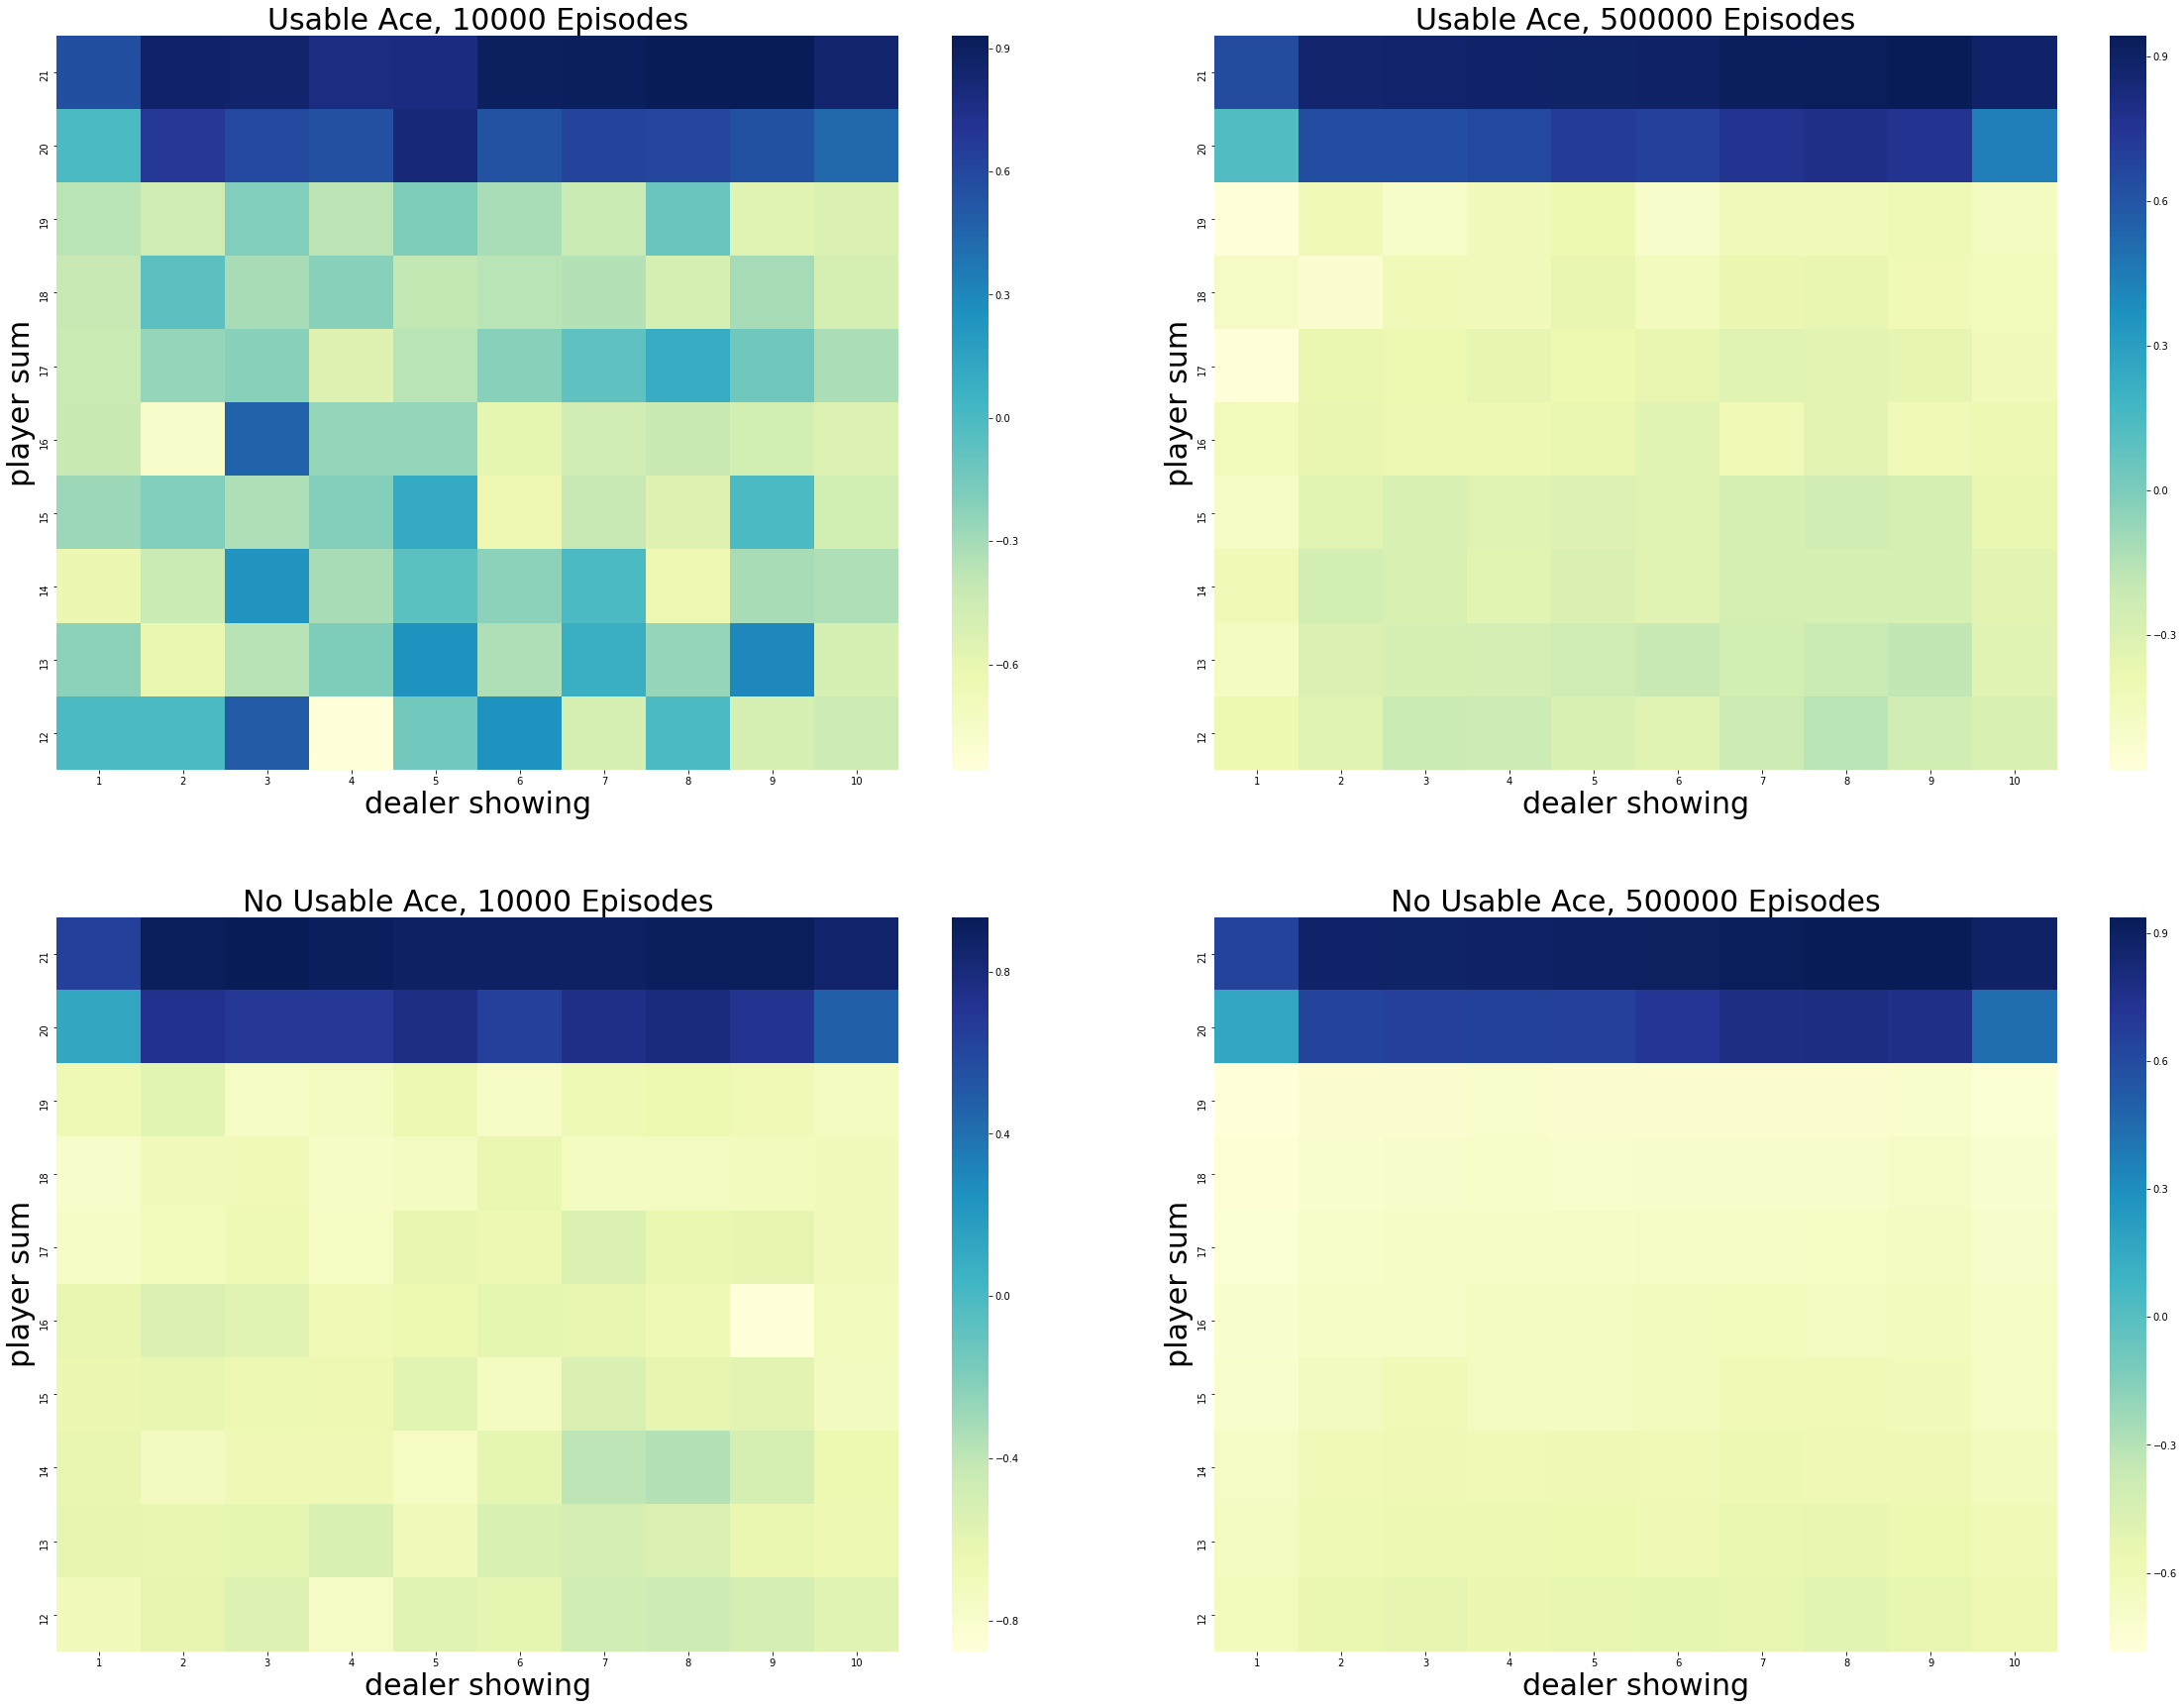

In [14]:
figure_5_1()
# 没有试探性出发
# 使用同轨策略
# 不仅仅评估价值，有控制

100%|█████████████████████████████| 500000/500000 [00:21<00:00, 23505.03it/s]


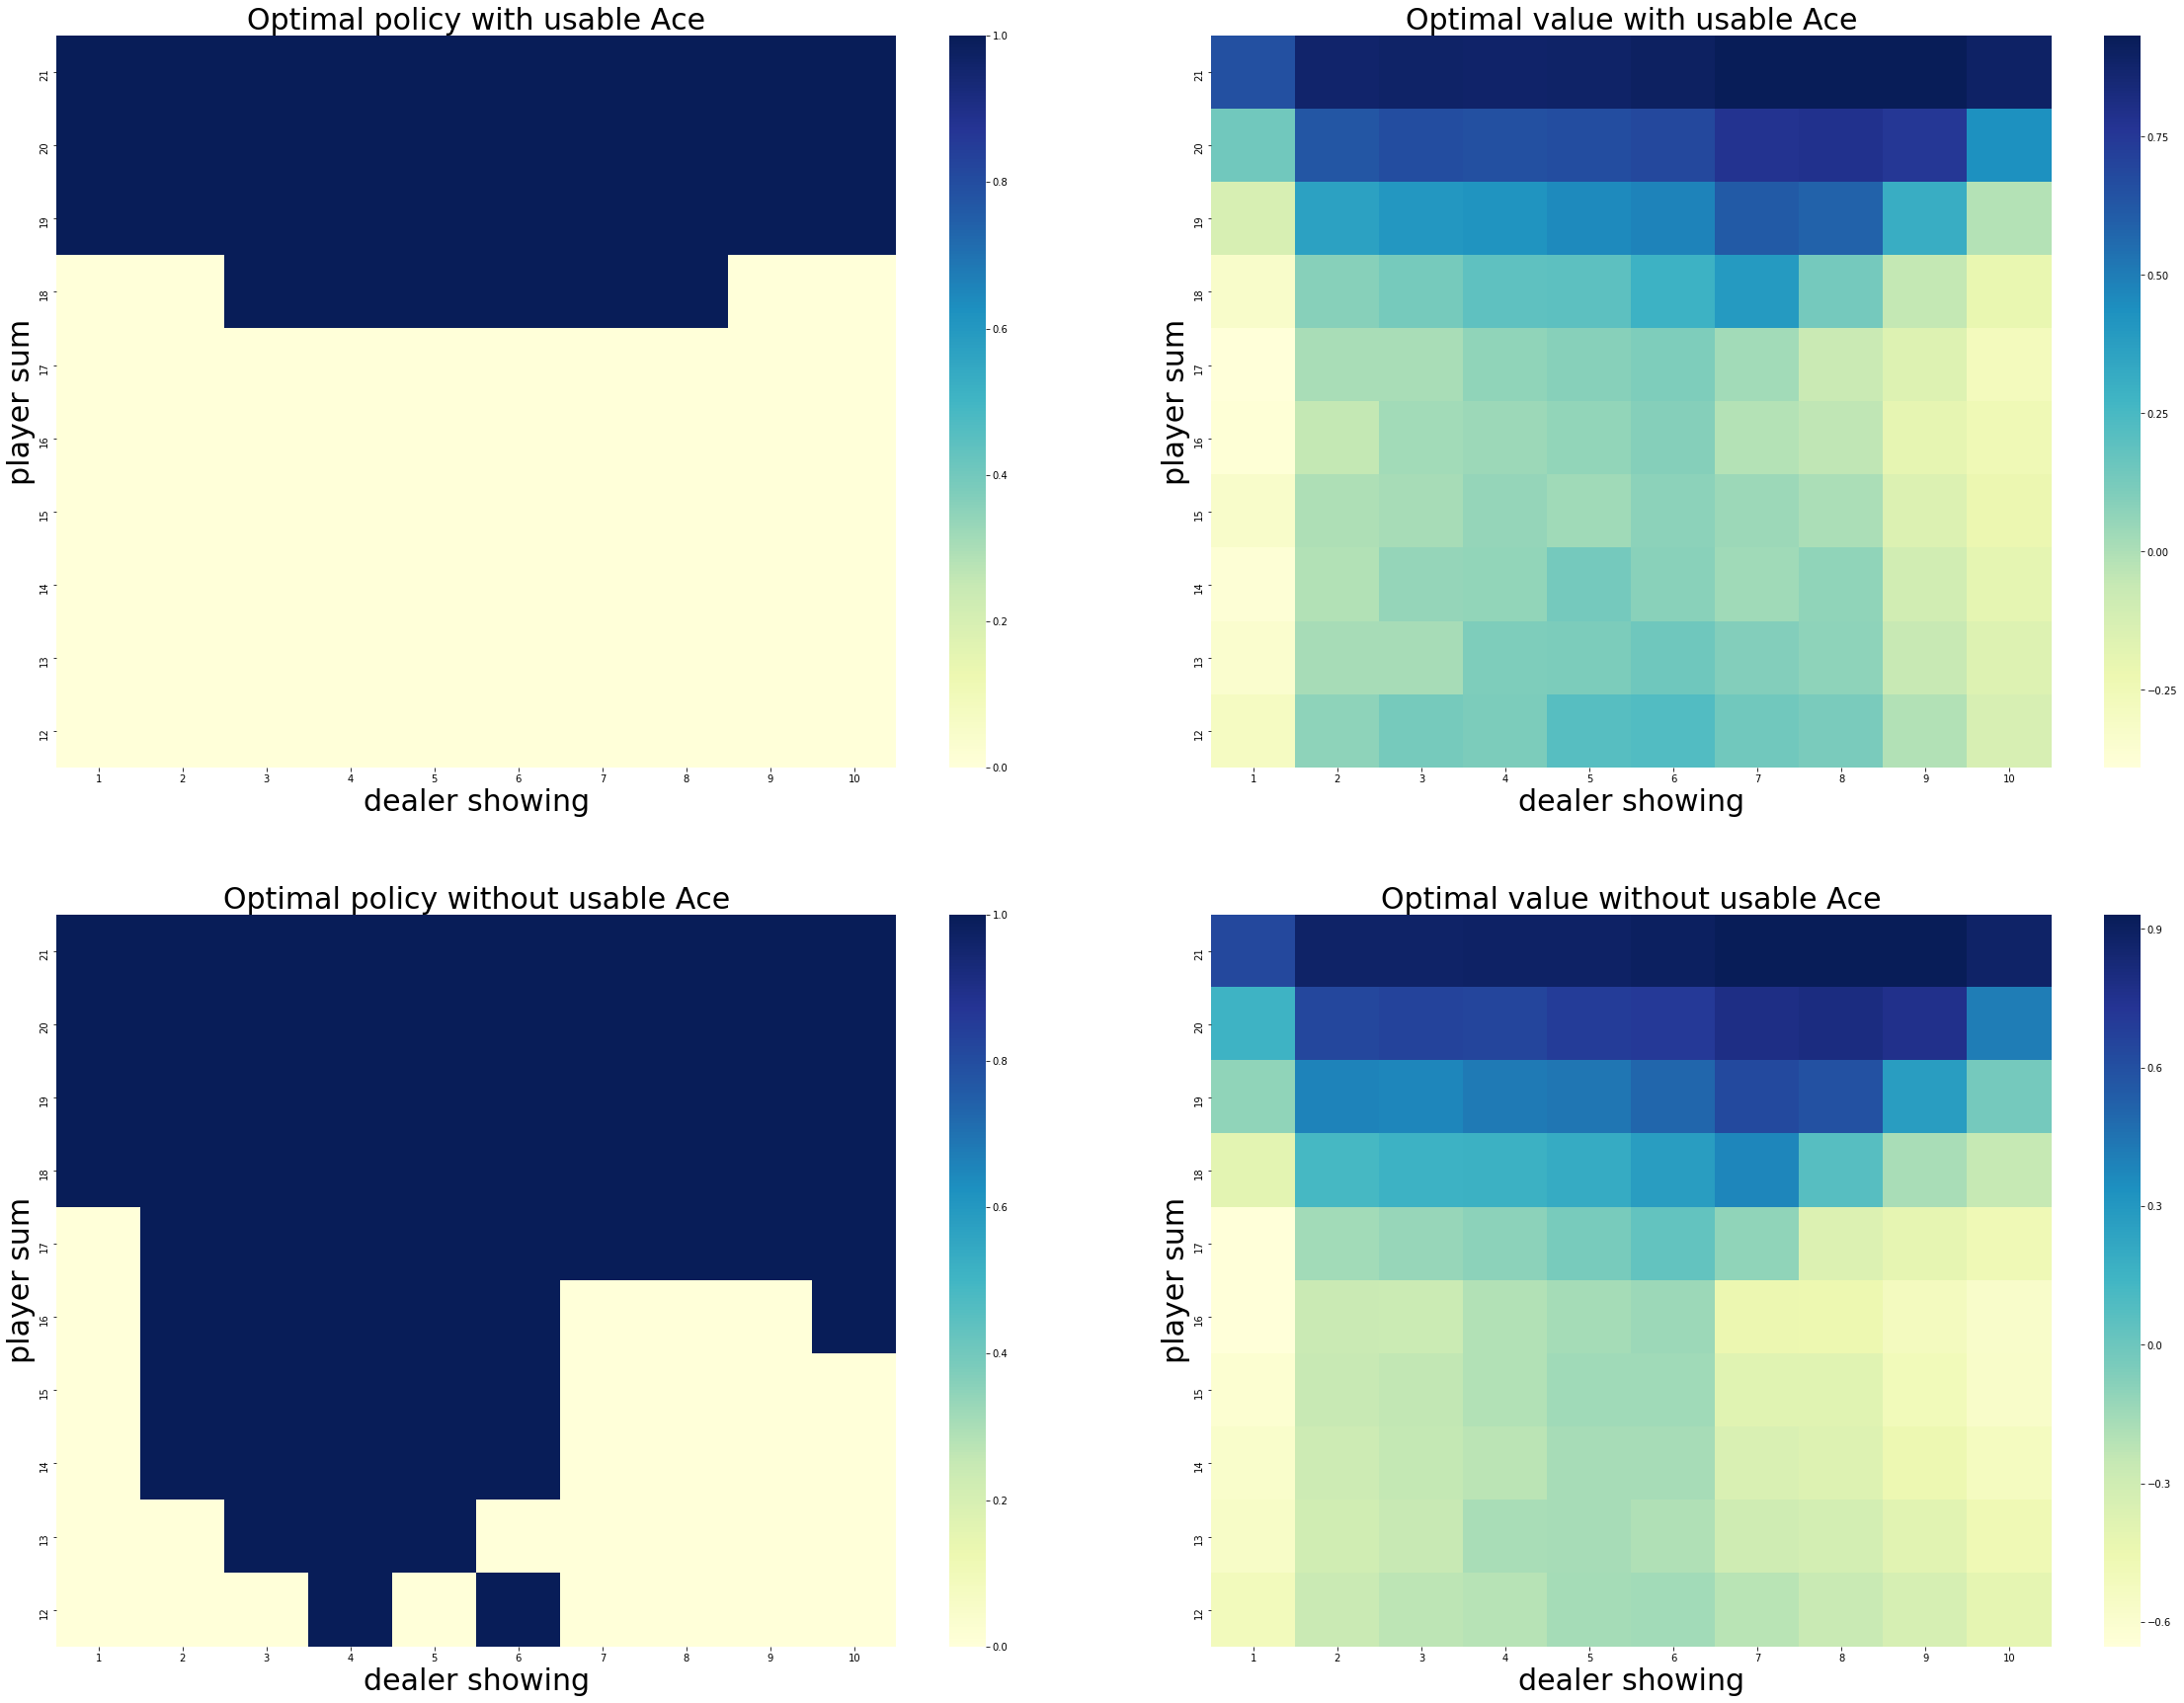

In [15]:
figure_5_2()
# 试探性出发
# 书 P99
# 对策略有控制，即尝试逼近 $\pi_*$

100%|██████████████████████████████████████| 100/100 [00:14<00:00,  7.16it/s]


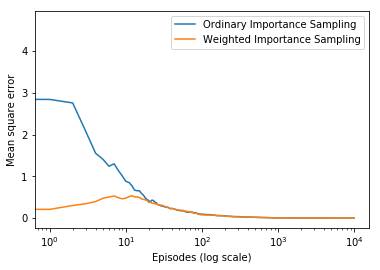

In [16]:
figure_5_3()
# 对二十一点游戏分布进行离轨策略，没有控制：
#     - 普通重要度采样
#     - 加权重要度采样
# （因为这个问题中，每幕的回报为 0 / 1 ，因此更新公式看起来有些奇怪 \
#     且 离轨观测序列 b 策略服从二项分布）
# 最后比较二者（两个采样率下 价值 的均方误差）
# （我对于均方误差的更新公式存疑，需要进行数学推导）

#### Example 5.5: Infinite Variance

The estimates of ordinary importance sampling will typically have infinite variance, and thus unsatisfactory convergence properties, whenever the scaled returns have infinite variance—and this can easily happen in o↵-policy learning when trajectories contain loops. A simple example is shown inset in Figure 5.4. There is only one nonterminal state s and two actions, right and left. The right action causes a deterministic transition to termination, whereas the left action transitions, with probability 0.9, back to s or, with probability 0.1, on to termination. The rewards are +1 on the latter transition and otherwise zero. Consider the target policy that always selects left. All episodes under this policy consist of some number (possibly zero) of transitions back to s followed by termination with a reward and return of +1. Thus the value of s under the target policy is 1 ($\gamma = 1$). Suppose we are estimating this value from o↵-policy data using the behavior policy that selects right and left with equal probability.

![](images/04-03.png)

In [17]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

ACTION_BACK = 0
ACTION_END = 1

# behavior policy
def behavior_policy():
    return np.random.binomial(1, 0.5)

# target policy
def target_policy():
    return ACTION_BACK

# one turn
def play():
    # track the action for importance ratio
    trajectory = []
    while True:
        action = behavior_policy()
        trajectory.append(action)
        if action == ACTION_END:
            return 0, trajectory
        if np.random.binomial(1, 0.9) == 0:
            return 1, trajectory

def figure_5_4():
    runs = 10
    episodes = 100000
    for run in range(runs):
        rewards = []
        for episode in range(0, episodes):
            reward, trajectory = play()
            if trajectory[-1] == ACTION_END:
                rho = 0
            else:
                rho = 1.0 / pow(0.5, len(trajectory))
            rewards.append(rho * reward)
        rewards = np.add.accumulate(rewards)
        estimations = np.asarray(rewards) / np.arange(1, episodes + 1)
        plt.plot(estimations)
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Ordinary Importance Sampling')
    plt.xscale('log')

    plt.show()

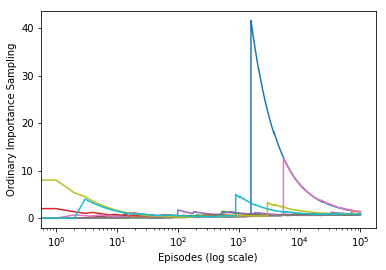

In [18]:
figure_5_4()
# 基于普通重要度采样的“首次访问型”MC算法的10次独立运行结果，
# 预测值不收敛到正确的1
# 存疑：这个应该不是“首次访问型”